<a href="https://colab.research.google.com/github/ashirwadsangwan/Tabular-Data-Projects/blob/master/Reg_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
fluff, id = 'https://drive.google.com/open?id=1t_FbhXUkImzmuDh8ti94intASDU6o0vs'.split('=')
print (id) # Verify that you have everything after '='

1t_FbhXUkImzmuDh8ti94intASDU6o0vs


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings as fw
fw('ignore')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Schedule Data.csv')  
schedule_data = pd.read_csv('Schedule Data.csv')

In [0]:
fluff, id = 'https://drive.google.com/open?id=1rGZjKESwVuHnAU-JMlsExS1XA9WigkV5'.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ASSET_METADATA.csv')  
asset_meta = pd.read_csv('ASSET_METADATA.csv')

In [6]:
asset_meta.columns

Index(['ASSET_ID', 'RELEASE_YEAR', 'MPAA_RATING', 'GENRE', 'IMDB_RATING',
       'IMDB_RANKING', 'IMDB_VOTES', 'Oscar-Nomination', 'Oscar-Wins',
       'Other - Nominations', 'Other - Wins', 'TOMATO_METER', 'TOMATO_RATING',
       'TOMATO_REVIEWS', 'TOMATO_FRESH', 'TOMATO_ROTTEN', 'TOMATO_USER_METER',
       'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS', 'TOMATO_IMAGE',
       'BOX_OFFICE_EARNINGS'],
      dtype='object')

In [7]:
schedule_data.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE', 'C3_RATING'],
      dtype='object')

In [8]:
import gc
df = schedule_data.merge(asset_meta, on='ASSET_ID', how='left')
del schedule_data, asset_meta
gc.collect()

407

In [0]:
df.loc[:, 'IMDB_VOTES'] = df.IMDB_VOTES.str.replace(",", "").astype('int')

In [0]:
df.loc[:, 'BOX_OFFICE_EARNINGS'] = df.BOX_OFFICE_EARNINGS.str.replace(",", "")
df.loc[:, 'BOX_OFFICE_EARNINGS'] = df.BOX_OFFICE_EARNINGS.str.replace("$", "").astype('float')

In [0]:
from datetime import datetime
df.loc[:, 'AIRING_START_DATE_TIME'] = pd.to_datetime(df.AIRING_START_DATE_TIME)
df.loc[:, 'AIRING_END_DATE_TIME'] = pd.to_datetime(df.AIRING_END_DATE_TIME)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 30 columns):
ASSET_ID                  2517 non-null int64
AIRING_START_DATE_TIME    2517 non-null datetime64[ns]
AIRING_END_DATE_TIME      2517 non-null datetime64[ns]
PREMIER_AIRING            2517 non-null int64
EXHIBITION_AIRING         2517 non-null int64
FREE_AIRING               2517 non-null int64
SCHEDULED_RUNTIME         2517 non-null int64
DAY_PART                  2517 non-null object
AIRING_REVENUE            2517 non-null int64
C3_RATING                 2509 non-null float64
RELEASE_YEAR              2517 non-null float64
MPAA_RATING               2487 non-null object
GENRE                     2517 non-null object
IMDB_RATING               2517 non-null float64
IMDB_RANKING              1940 non-null float64
IMDB_VOTES                2517 non-null int64
Oscar-Nomination          2517 non-null int64
Oscar-Wins                2517 non-null int64
Other - Nominations       2517 non-n

In [0]:
df_obj = df.select_dtypes('object').copy()

In [0]:
def label_encoding(dataframe):
    new_df = dataframe.select_dtypes('object')
    
    for i in new_df.columns:
        new_df[i] = new_df[i].astype('category')
        new_df[i]  = new_df[i].cat.codes
        dataframe[i] = new_df[i]
    return dataframe

In [0]:
df_cat = label_encoding(df.copy())

In [16]:
df_cat.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,Other - Wins,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE,BOX_OFFICE_EARNINGS
0,174543,2013-09-13 21:15:00,2013-09-13 23:45:00,0,1,0,150,4,197840,595443.0,2000.0,6,73,7.8,69.0,205473,2,0,35,7,77.0,7.1,148.0,114.0,34.0,89.0,3.7,254542.0,0,45200000.0
1,181758,2014-09-24 00:00:00,2014-09-24 03:00:00,0,0,1,180,5,89818,216841.0,1999.0,7,42,8.7,73.0,1080566,4,4,40,33,87.0,7.6,139.0,121.0,18.0,85.0,3.6,33318840.0,0,NaN
2,191074,2013-09-12 14:15:00,2013-09-12 16:15:00,0,1,0,120,1,60064,388053.0,1990.0,7,24,5.7,NaN,19896,0,0,0,0,33.0,3.7,12.0,4.0,8.0,47.0,2.7,44787.0,2,NaN
3,196156,2013-07-14 18:00:00,2013-07-14 21:00:00,1,1,0,180,2,164494,670869.0,2006.0,6,10,8.0,81.0,407119,0,0,34,27,95.0,7.8,222.0,210.0,12.0,89.0,3.9,698710.0,0,167000000.0
4,174201,2014-11-14 15:30:00,2014-11-14 17:30:00,0,0,1,120,1,86961,311122.0,1993.0,7,10,6.4,60.0,87972,3,0,7,1,69.0,6.2,49.0,34.0,15.0,51.0,2.8,182483.0,1,NaN


In [17]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 30 columns):
ASSET_ID                  2517 non-null int64
AIRING_START_DATE_TIME    2517 non-null datetime64[ns]
AIRING_END_DATE_TIME      2517 non-null datetime64[ns]
PREMIER_AIRING            2517 non-null int64
EXHIBITION_AIRING         2517 non-null int64
FREE_AIRING               2517 non-null int64
SCHEDULED_RUNTIME         2517 non-null int64
DAY_PART                  2517 non-null int8
AIRING_REVENUE            2517 non-null int64
C3_RATING                 2509 non-null float64
RELEASE_YEAR              2517 non-null float64
MPAA_RATING               2517 non-null int8
GENRE                     2517 non-null int16
IMDB_RATING               2517 non-null float64
IMDB_RANKING              1940 non-null float64
IMDB_VOTES                2517 non-null int64
Oscar-Nomination          2517 non-null int64
Oscar-Wins                2517 non-null int64
Other - Nominations       2517 non-null i

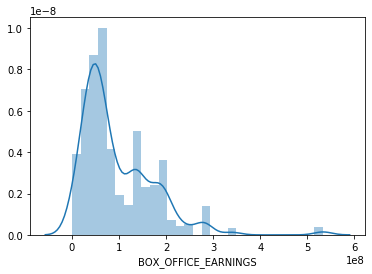

In [23]:
sns.distplot((df.BOX_OFFICE_EARNINGS.dropna()))